<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Second-Level-Design-Matrix" data-toc-modified-id="Second-Level-Design-Matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Second Level Design Matrix</a></span></li><li><span><a href="#Valence-x-Outcome-Sanity-Check" data-toc-modified-id="Valence-x-Outcome-Sanity-Check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Valence x Outcome Sanity Check</a></span></li><li><span><a href="#Adolescent-Cohort" data-toc-modified-id="Adolescent-Cohort-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adolescent Cohort</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monetary Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Young-Adult-Cohort" data-toc-modified-id="Young-Adult-Cohort-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Young Adult Cohort</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Monetary Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Group-differences" data-toc-modified-id="Group-differences-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Group differences</a></span><ul class="toc-item"><li><span><a href="#Monetary-Task" data-toc-modified-id="Monetary-Task-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Monetary Task</a></span></li><li><span><a href="#Social-Task" data-toc-modified-id="Social-Task-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Social Task</a></span><ul class="toc-item"><li><span><a href="#Positive-win->-Positive-loss" data-toc-modified-id="Positive-win->-Positive-loss-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Positive win &gt; Positive loss</a></span></li><li><span><a href="#All-wins->-All-losses" data-toc-modified-id="All-wins->-All-losses-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>All wins &gt; All losses</a></span></li></ul></li></ul></li><li><span><a href="#Accounting-for-Age" data-toc-modified-id="Accounting-for-Age-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Accounting for Age</a></span></li></ul></div>

In [17]:
import os
import glob
import pandas as pd
import numpy as np

from matplotlib.gridspec import GridSpec

# Import cerebellum packages
import matplotlib.pyplot as plt
import SUITPy.flatmap as flatmap

from nilearn.glm.second_level import make_second_level_design_matrix
from nilearn.plotting import plot_design_matrix, plot_stat_map
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img



In [14]:
def plot_stat_contours(filename, thresh=1, mc='fpr', mc_alpha=0.001, clust_alpha=0.05, view='split', title=''):
    # Find type of analysis
    analysis = 'group'
    
    # Find stat map
    stat_filename = os.path.join(outp_dir, analysis,  
                                    filename+'_unc.nii.gz')
    #stat_filename_mc = os.path.join(outp_dir, analysis,  
    #                                filename+'_fpr-'+str(mc_alpha)+'_clust-'+str(clust_alpha)+'.nii.gz')
    stat_filename_mc = os.path.join(outp_dir, analysis,  
                                    filename+'_'+mc+'-'+str(mc_alpha)+'.nii.gz')
    
    # Import stat map as a cerebellum flatmap
    funcdata = flatmap.vol_to_surf(stat_filename_mc,
                                  space='SUIT')
    
    
    
    mc_thresh = threshold_data[filename+'_'+mc+'-'+str(mc_alpha)]
    #print(mc_thresh)
    if mc_thresh == np.inf:
        mc_thresh = 1000

    if view == 'split':
        # Set figure specs
        fig = plt.figure(figsize=(15, 4))
        gs = GridSpec(2, 3)
        ax_img1 = plt.subplot(gs[0, :2])
        ax_img2 = plt.subplot(gs[1, :2])
        
        hemi_lh = plot_stat_map(stat_filename, threshold=thresh, axes=ax_img1,
                                cut_coords=range(-65,0, 10), display_mode='x', colorbar=True,
                                cmap='coolwarm', symmetric_cbar=True, title='Left Hemisphere',
                                annotate=False)
        hemi_rh = plot_stat_map(stat_filename, threshold=thresh, axes=ax_img2,
                                cut_coords=range(66,5, -10), display_mode='x', colorbar=True,
                                cmap='coolwarm', symmetric_cbar=True, title='Right Hemisphere',
                                annotate=False)
        hemi_lh.add_contours(stat_filename_mc, levels=[-0.1,0.1], colors=['blue','red'], 
                          alpha=1, linewidths=1)
        hemi_rh.add_contours(stat_filename_mc, levels=[-0.1,0.1], colors=['blue','red'], 
                          alpha=1, linewidths=1)
        
        ax_joint = plt.subplot(gs[:, 2:])
        ax_joint.set(title='Cerebellum flatmap')
        flatmap.plot(data=funcdata, cmap='hot',
                    threshold=[-.1,.1],
                    colorbar=False,
                    render='matplotlib', new_figure=False)
        
    elif view == 'straight':
        hemi_bh = plot_stat_map(stat_filename, threshold=thresh, 
                      cut_coords=range(-65,66, 10), display_mode='x', colorbar=True,
                      cmap='coolwarm', symmetric_cbar=True, title=title)
        hemi_bh.add_contours(stat_filename_mc, levels=[-0.1,0.1], colors=['blue','red'], 
                          alpha=1, linewidths=2)

In [15]:
#bids_dir = '/data/projects/social_doors/'
bids_dir = '/Users/haroonpopal/OneDrive - Temple University/olson_lab/projects/social_doors'


os.chdir(bids_dir)

data_dir = os.path.join(bids_dir, 'derivatives','social_doors-nilearn')
outp_dir = os.path.join(bids_dir, 'derivatives', 'social_doors-nilearn')


# Define subject list
#subjs_scan_info = pd.read_csv(bids_dir+'/derivatives/mriqc/mriqc_summary_poor.csv')
#subjs_list = list(subjs_scan_info['subject'].unique())
#subjs_list.sort()
subjs_info = pd.read_csv(bids_dir+'/derivatives/participants_good.tsv', sep='\t', index_col=0)
subjs_info = subjs_info.rename(columns={'participant_id': 'subject_label'})

# Remove participants with bad data
subjs_info = subjs_info[subjs_info['subject_label'].str.contains('sub-3880')==False]
subjs_info = subjs_info[subjs_info['subject_label'].str.contains('sub-4069')==False]


subjs_info_kids = subjs_info[subjs_info['group']=='kid']
subjs_info_colg = subjs_info[subjs_info['group']=='college']

subjs_list = subjs_info['subject_label'].to_list()
subjs_list_kids = subjs_info_kids['subject_label'].to_list()
subjs_list_colg = subjs_info_colg['subject_label'].to_list()

print('Found '+str(len(subjs_list_kids))+' adolescent subjects')
print('Found '+str(len(subjs_list_colg))+' college subjects')

Found 32 adolescent subjects
Found 29 college subjects


# Adolescents

In [4]:
# Filter for releveant data
subjs_info_fltr = subjs_info[['subject_label', 'age']]
subjs_info_kids_fltr = subjs_info_kids[['subject_label','age']]
subjs_info_colg_fltr = subjs_info_colg[['subject_label','age']]

In [5]:

design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/glm/first_level/design_matrix.py:512: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  "Attention: Design matrix is singular. Aberrant estimates "


<AxesSubplot:label='conditions', ylabel='scan number'>

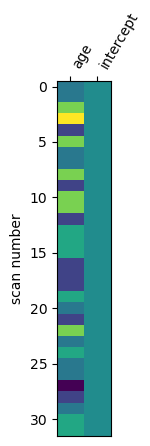

In [6]:

plot_design_matrix(design_matrix)

In [9]:
design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)
mni_mask = bids_dir+"/derivatives/fmriprep/sub-010/anat/sub-010_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['age','intercept']
tasks = ['mdoors','social']
group = 'adole'
mc = 'fdr'
alpha = 0.05


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_kids:
            temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' '+group+' '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control=mc)
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)+'.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)] = threshold

Calculating mdoors adole all_winVlos contrast
Calculating mdoors adole positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.9708165692795103. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.958485445639618. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social adole all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.510752872318276. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.508400631846887. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social adole positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.4942643837543077. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.5963192432734217. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


### Monetary Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


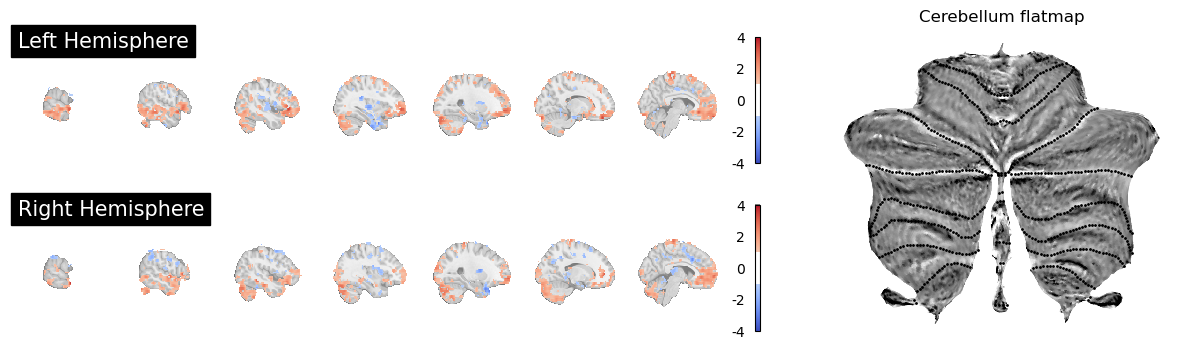

In [18]:
plot_stat_contours('zmap_adole_mdoors_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


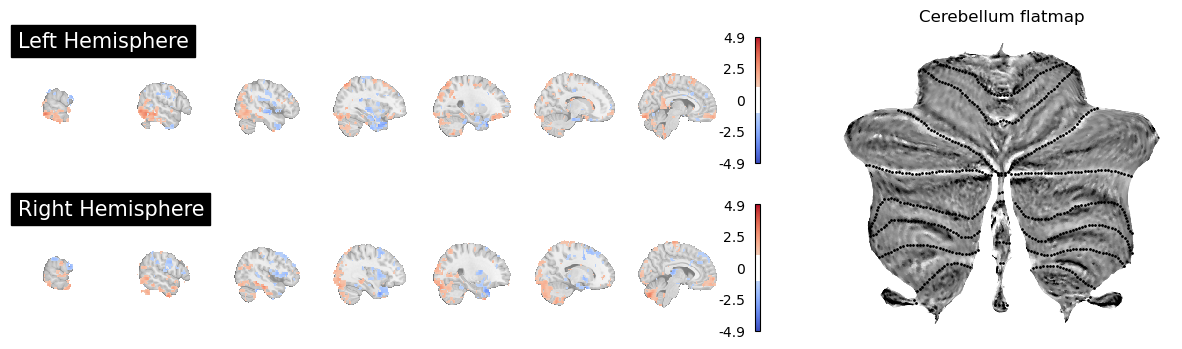

In [19]:
plot_stat_contours('zmap_adole_mdoors_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

### Social Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


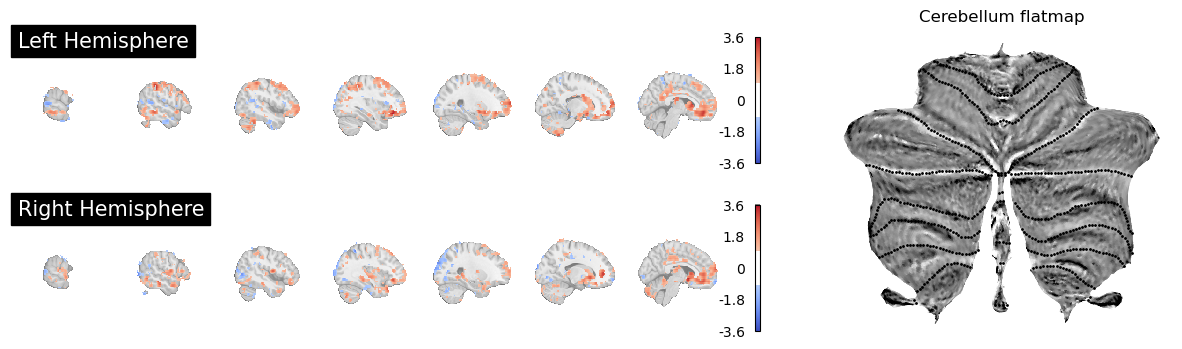

In [20]:
plot_stat_contours('zmap_adole_social_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


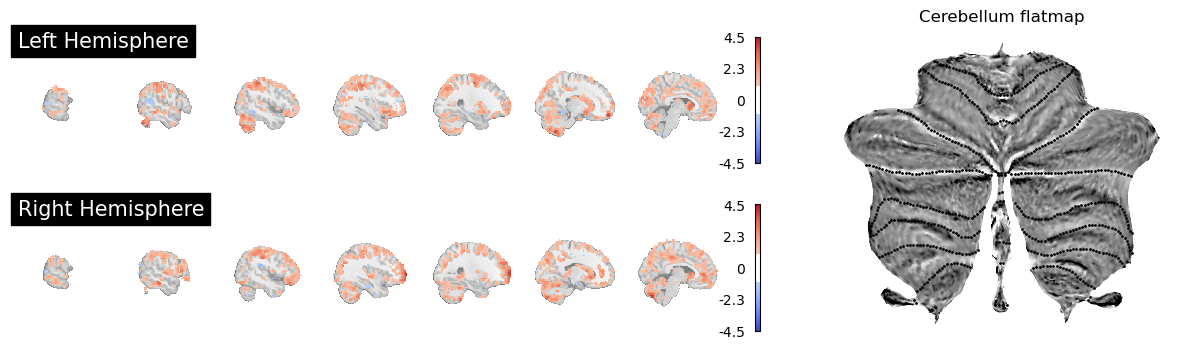

In [21]:
plot_stat_contours('zmap_adole_social_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

## Young Adult Cohort

In [22]:
design_matrix = make_second_level_design_matrix(subjs_list_colg, subjs_info_colg_fltr)


contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['age','intercept']
tasks = ['mdoors','social']
group = 'adult'
mc = 'fdr'
alpha = 0.05


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_colg:
            temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control=mc)
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)+'.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)] = threshold

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/glm/first_level/design_matrix.py:512: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  "Attention: Design matrix is singular. Aberrant estimates "


Calculating mdoors group all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.203566601487279. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.167974465346996. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating mdoors group positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.9141796562960023. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.084015253903517. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social group all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.3268064045150165. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.9574459271213835. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social group positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.241392440352204. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.8821727666010686. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


### Monetary Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


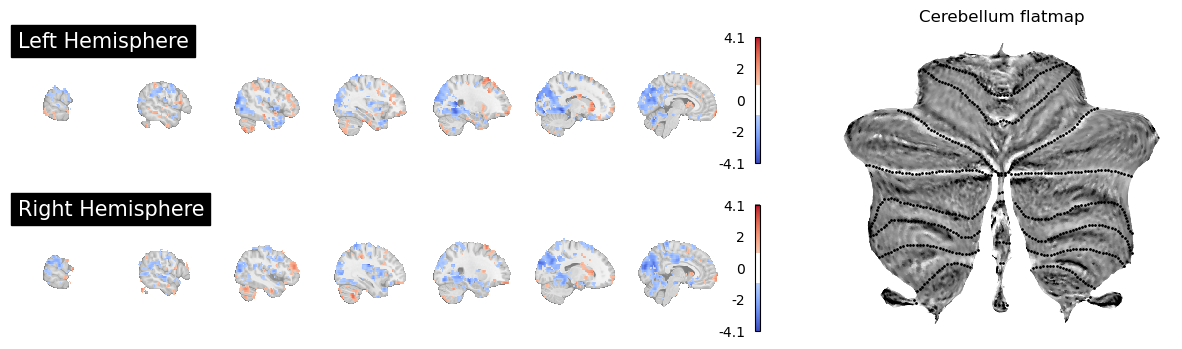

In [24]:
plot_stat_contours('zmap_adult_mdoors_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


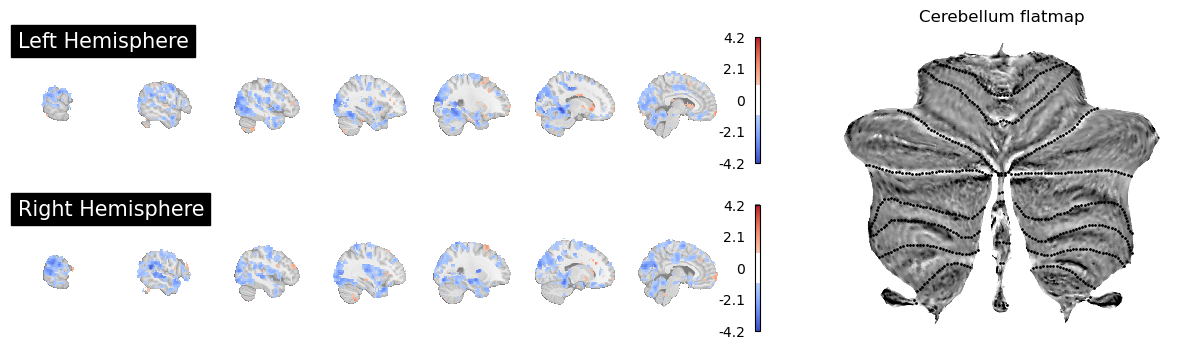

In [26]:
plot_stat_contours('zmap_adult_mdoors_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

### Social Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


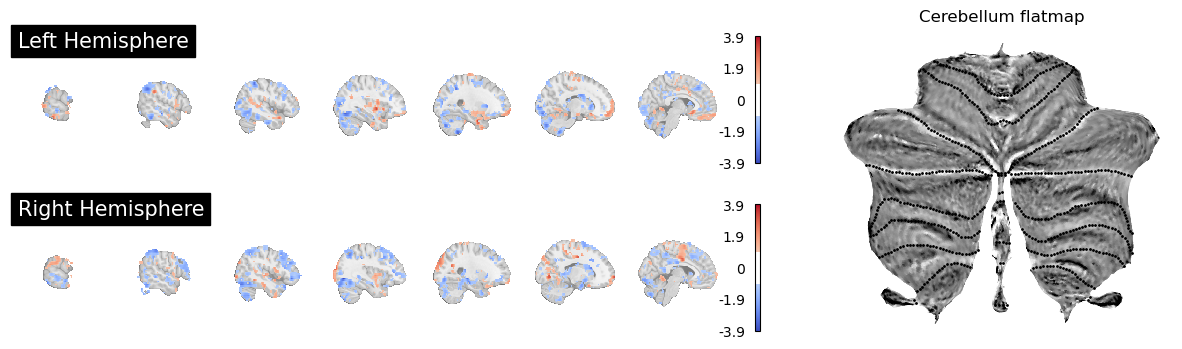

In [27]:
plot_stat_contours('zmap_adult_social_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


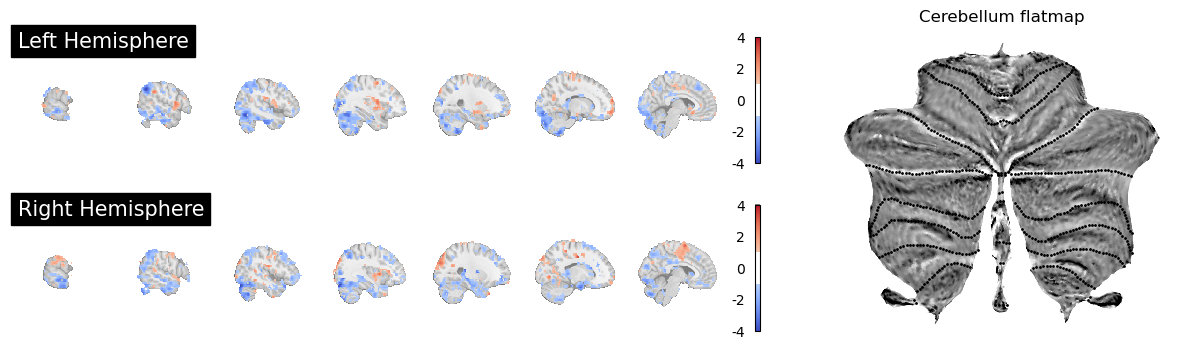

In [28]:
plot_stat_contours('zmap_adult_social_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

# All Subjects

<AxesSubplot:label='conditions', ylabel='scan number'>

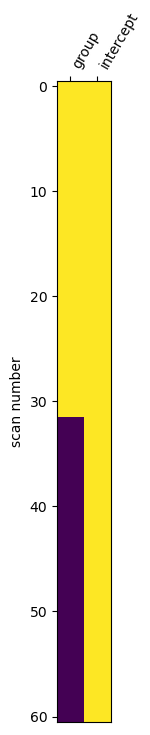

In [29]:
subjs_info_num = subjs_info.copy()
subjs_info_num = subjs_info_num.replace({'sex': {'F': 0, 'M': 1},
                                         'group': {'college': -1, 'kid': 1}})
subjs_info_num = subjs_info_num.drop(columns=['age', 'sex'])

design_matrix = make_second_level_design_matrix(subjs_list, subjs_info_num)

plot_design_matrix(design_matrix)

In [30]:
#design_matrix = make_second_level_design_matrix(subjs_list, subjs_info_fltr)

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['intercept','group']
tasks = ['mdoors','social']
group = 'all'
mc = 'fdr'
alpha = 0.05

threshold_all = {}

#temp_file_list = []
#for subj in subjs_list_kids:
#    temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii.gz'))
#    temp_file_list.append(temp_file[0])
for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list:
            temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' '+group+' '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control=mc)
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)+'.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_'+mc+'-'+str(alpha)] = threshold

Calculating mdoors all all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.4083026196757293. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating mdoors all positive_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 3.443543850800665. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social all all_winVlos contrast


/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/param_validation.py:73: UserWarning: The given float value must not exceed 4.381922649003004. But, you have given threshold=inf.
  f"The given float value must not exceed {value_check}. "


Calculating social all positive_winVlos contrast


## Group differences 
Where adolescents > young adults

### Monetary Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


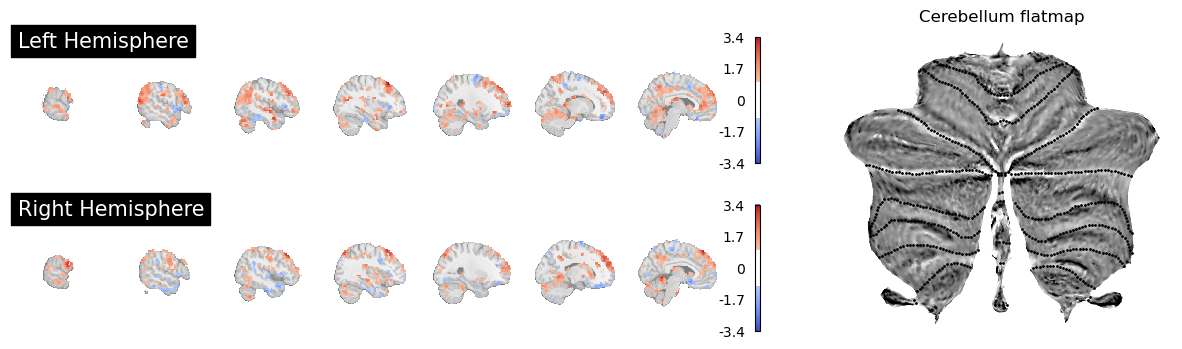

In [31]:
plot_stat_contours('zmap_all_mdoors_positive_winVlos_group', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


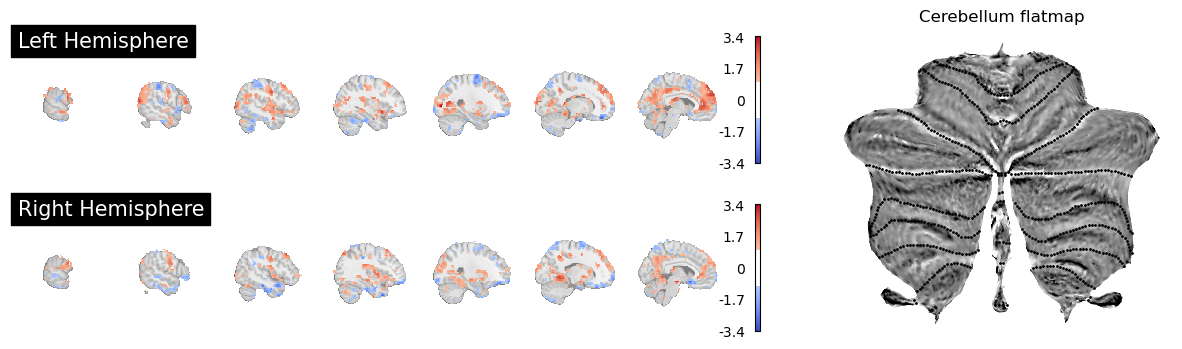

In [33]:
plot_stat_contours('zmap_all_mdoors_all_winVlos_group', mc='fdr', mc_alpha=0.05, thresh=1)

### Social Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


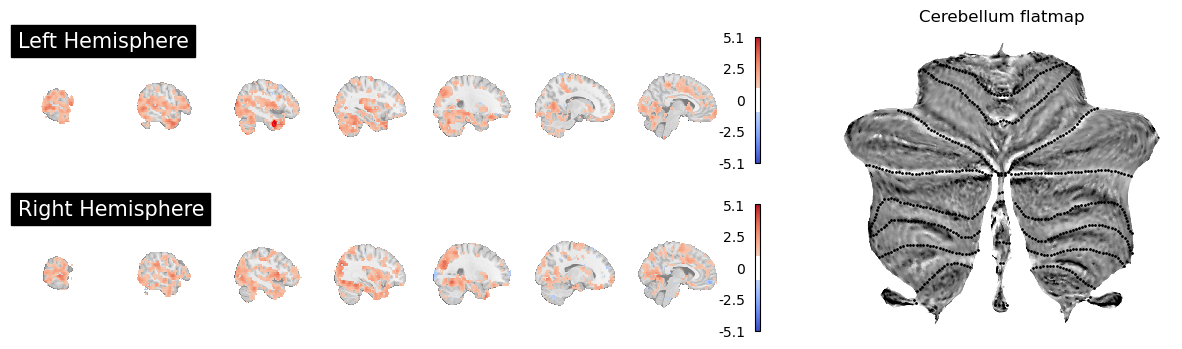

In [34]:
plot_stat_contours('zmap_all_social_positive_winVlos_group', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_slicers.py:434: UserWarning: empty mask
  new_img_like(img, not_mask, affine)
/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


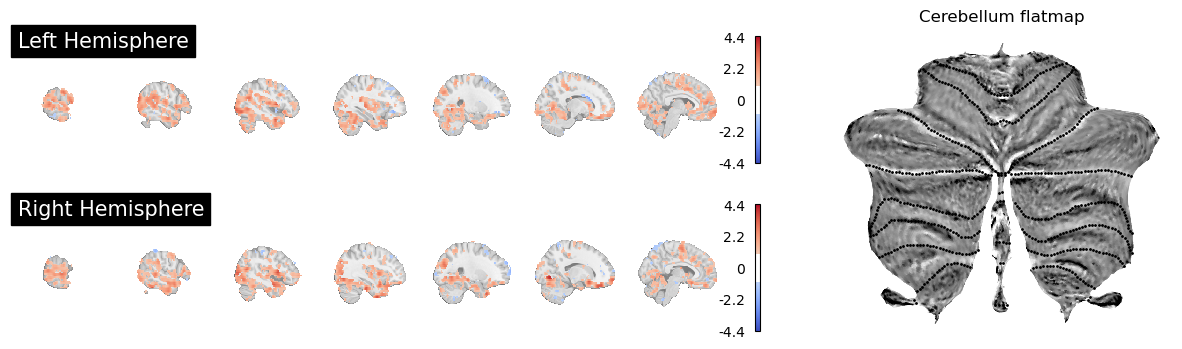

In [36]:
plot_stat_contours('zmap_all_social_all_winVlos_group', mc='fdr', mc_alpha=0.05, thresh=1)

## Accounting for Group

### Monetary Task

#### Positive win > Positive loss

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


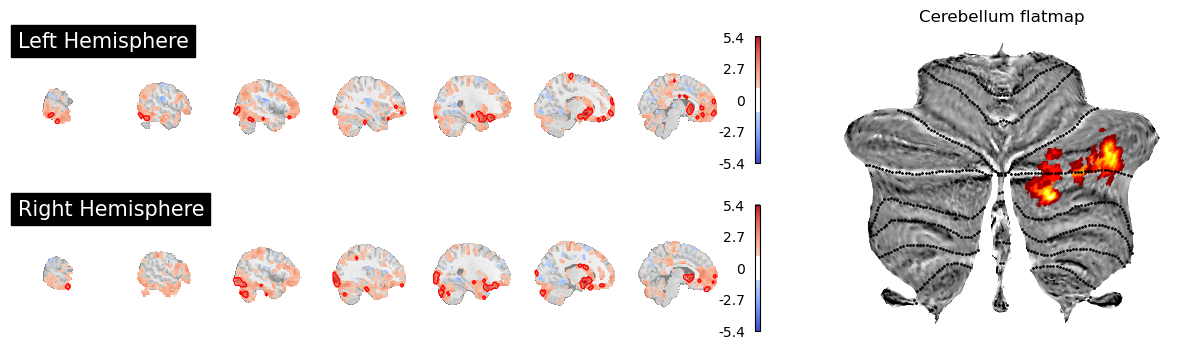

In [37]:
plot_stat_contours('zmap_all_mdoors_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:75: UserWarning: No contour levels were found within the data range.
  data_2d.copy(), extent=(xmin, xmax, zmin, zmax), **kwargs


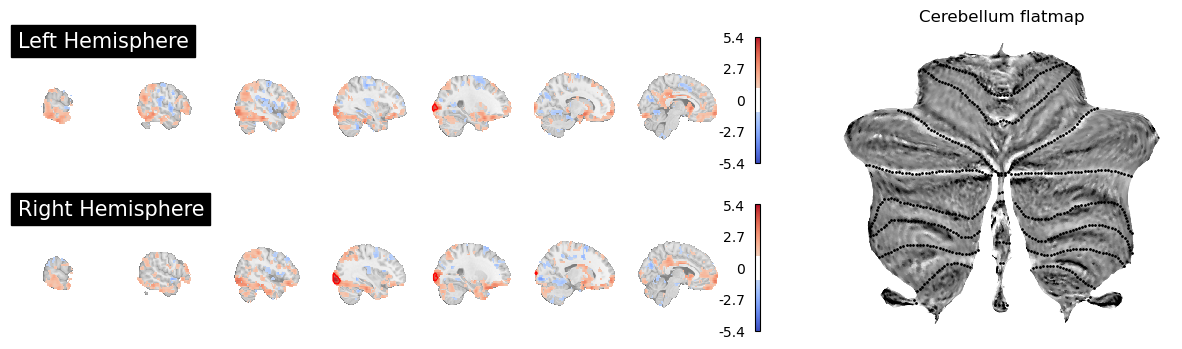

In [38]:
plot_stat_contours('zmap_all_mdoors_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

### Social Task

#### Positive wins > Positive losses

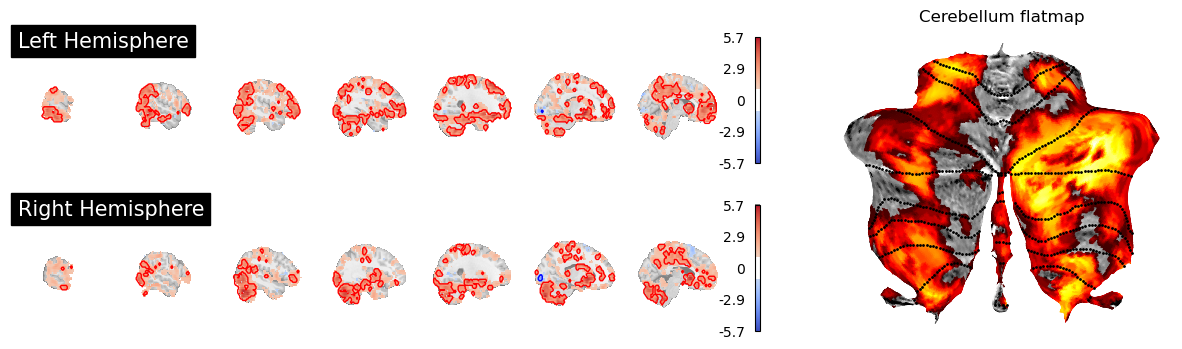

In [39]:
plot_stat_contours('zmap_all_social_positive_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

#### All wins > All losses

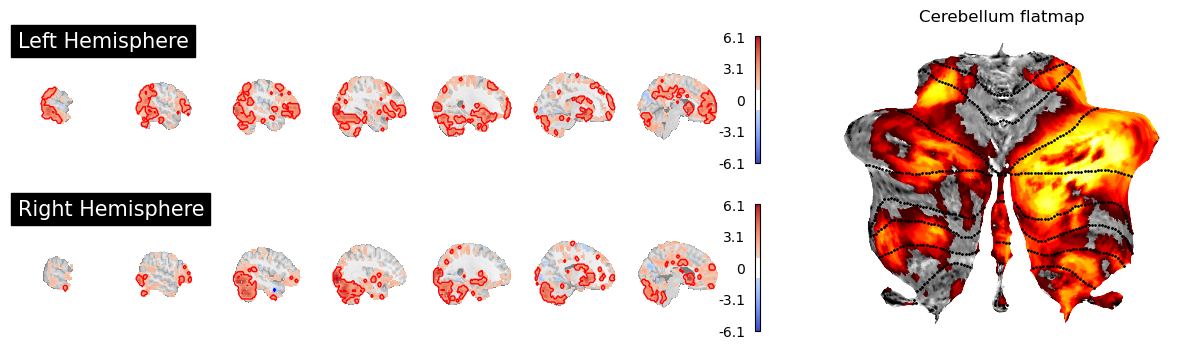

In [40]:
plot_stat_contours('zmap_all_social_all_winVlos_intercept', mc='fdr', mc_alpha=0.05, thresh=1)

# Behavioral Analysis

Not updated

In [62]:
behav_data = pd.read_excel(bids_dir+'/derivatives/behavioral/aggregate_full_data_SPSS_020419.xlsx',
                          sheet_name='Sheet1')

behav_data.head()

Order Subject  ch_totanx  ch_socialanx  p_totanx  p_socialanx  bfne  \
0      1    s010         51            14         7            1    33   
1      1    s011         12             3         4            1    31   
2      1    s013          8             4         1            1    13   
3      1    s015         18             5         1            0    21   
4      2    s024         21            10         0            0    28   

   ch_cdi_total  ch_cdi_interpersonal  ch_cdi_anhedonia  ...  \
0          11.0                   0.0               5.0  ...   
1           8.0                   0.0               3.0  ...   
2           5.0                   0.0               2.0  ...   
3           NaN                   NaN               NaN  ...   
4           1.0                   0.0               0.0  ...   

   FB_VS_6mm_R_Like_Lose_NZMean_1  FB_VS_6mm_R_Like_Lose_NZCount_1  \
0                        0.029036                            123.0   
1                             NaN                              NaN   
2                       -0.308424                            123.0   
3                       -0.798996                            123.0   
4                             NaN                              NaN   

   FB_VS_6mm_R_Like_Lose_NZMin_1  FB_VS_6mm_R_Like_Lose_NZMax_1  \
0                      -0.296210                       0.647286   
1                            NaN                            NaN   
2                      -0.554069                       0.030482   
3                      -1.841710                      -0.031699   
4                            NaN                            NaN   

  FB_VS_6mm_R_Like_Win_Mean_1  FB_VS_6mm_R_Like_Win_NZMean_1  \
0                    0.256033                       0.256033   
1                         NaN                            NaN   
2                    0.093248                       0.093248   
3                    0.004660                       0.004660   
4                         NaN                            NaN   

   FB_VS_6mm_R_Like_Win_NZCount_1  FB_VS_6mm_R_Like_Win_NZMin_1  \
0                           123.0                     -0.022722   
1                             NaN                           NaN   
2                           123.0                     -0.183241   
3                           123.0                     -1.020790   
4                             NaN                           NaN   

   FB_VS_6mm_R_Like_Win_NZMax_1  FB_VS6mm_L_Correct_DislikeVsLike  
0                      0.752379                         -0.127002  
1                           NaN                               NaN  
2                      1.003483                         -0.167305  
3                      0.809193                          0.485397  
4                           NaN                               NaN  

[5 rows x 1551 columns]

In [63]:
behav_data_fltr = behav_data[['Subject','ch_totanx', 'ch_cdi_total']]

behav_data_fltr['Subject'] = behav_data_fltr['Subject'].str.replace('s','sub-')

behav_data_fltr = behav_data_fltr.rename(columns={'Subject':'subject_label'})

behav_data_fltr.head()

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


subject_label  ch_totanx  ch_cdi_total
0       sub-010         51          11.0
1       sub-011         12           8.0
2       sub-013          8           5.0
3       sub-015         18           NaN
4       sub-024         21           1.0

/Users/haroonpopal/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/glm/first_level/design_matrix.py:475: UserWarning: Attention: Design matrix is singular. Aberrant estimates are expected.
  warn('Attention: Design matrix is singular. Aberrant estimates '


<AxesSubplot:label='conditions', ylabel='scan number'>

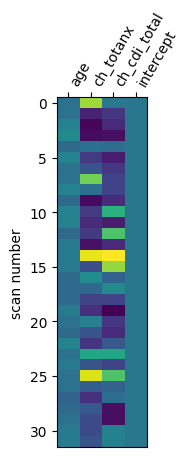

In [64]:
# Add behavioral data to design matrix

subjs_info_kids_behav = subjs_info_kids_fltr.merge(behav_data_fltr, on='subject_label')


design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_behav)

plot_design_matrix(design_matrix)

In [65]:
#design_matrix = make_second_level_design_matrix(subjs_list_kids, subjs_info_kids_fltr)
mni_mask = bids_dir+"/derivatives/fmriprep/sub-010/anat/sub-010_space-MNI152NLin2009cAsym_label-GM_probseg_bin.nii.gz"

#contrasts = ['valence_x_outcome',
#             'positive','positive_win','positive_loss',
#             'negative','negative_win','negative_loss']
contrasts=['all_winVlos', 'positive_winVlos']
contrasts_2nd = ['ch_totanx','ch_cdi_total']
tasks = ['mdoors','social']
group = 'kids'
alpha = 0.001


threshold_data = {}

for task in tasks:
    for contrast in contrasts:
        
        temp_file_list = []
        for subj in subjs_list_kids:
            temp_file = glob.glob(os.path.join(data_dir,subj,'zmap_'+task+'_'+contrast+'.nii'))
            temp_file_list.append(temp_file[0])
        temp_file_list.sort()
        
        print('Calculating '+task+' group '+contrast+' contrast')
        
        model = SecondLevelModel(mask_img=mni_mask, smoothing_fwhm=8.0)
        model.fit(temp_file_list, design_matrix=design_matrix)
        
        for contrast_2nd in contrasts_2nd:
            z_map = model.compute_contrast(contrast_2nd, output_type='z_score')

            z_map.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_unc.nii.gz'))
            
            # Multiple Comparisons Correction
            z_map_thresh, threshold = threshold_stats_img(z_map, alpha=alpha, height_control='fpr')
            z_map_thresh.to_filename(os.path.join(data_dir,'group',
                                       'zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr.nii.gz'))
            
            threshold_data['zmap_'+group+'_'+task+'_'+contrast+'_'+contrast_2nd+'_fpr_'+str(alpha)] = threshold

Calculating mdoors group all_winVlos contrast
Calculating mdoors group positive_winVlos contrast
Calculating social group all_winVlos contrast
Calculating social group positive_winVlos contrast


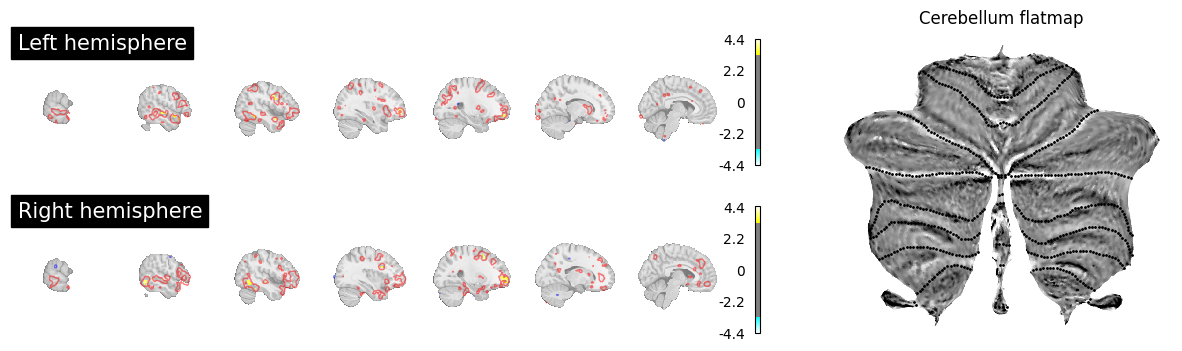

In [70]:
filename = 'zmap_kids_social_positive_winVlos_ch_cdi_total_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]
#threshold=1

plot_stat_map_cb(filename+'unc', threshold)

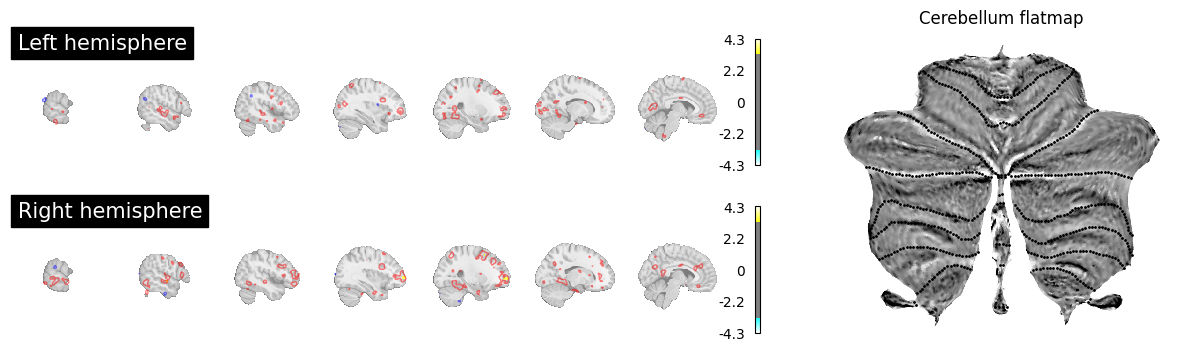

In [69]:
filename = 'zmap_kids_social_all_winVlos_ch_cdi_total_'
threshold = threshold_data[filename+'fpr_'+str(alpha)]
#threshold=1

plot_stat_map_cb(filename+'unc', threshold)